In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [86]:
concrete = pd.read_csv('concrete.csv')

In [70]:
concrete.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [220]:
concrete.isnull().any() #nie ma brakow danych

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

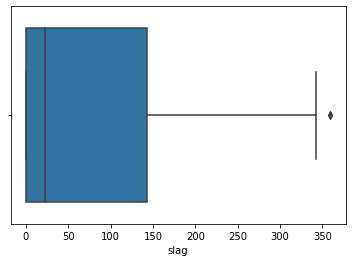

In [60]:
sns.boxplot(concrete.slag) # powyzej 350

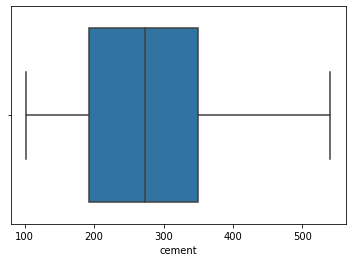

In [61]:
sns.boxplot(concrete.cement) #nie ma wartosci odstajacych

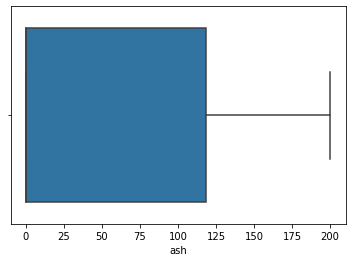

In [62]:
sns.boxplot(concrete.ash) #nie ma wartosci odstajacych

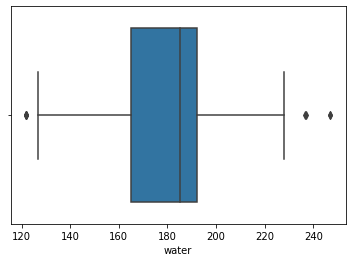

In [63]:
sns.boxplot(concrete.water) # ponizej 130 i powyzej 230

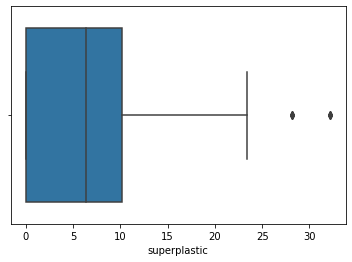

In [64]:
sns.boxplot(concrete.superplastic) #powyzej 25

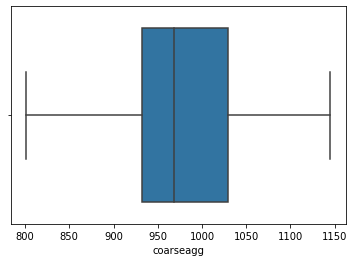

In [65]:
sns.boxplot(concrete.coarseagg) #nie ma wart odstajacych

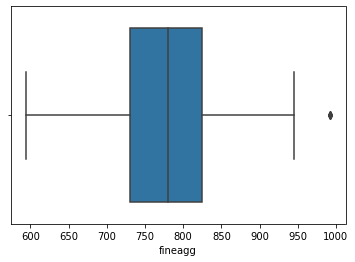

In [66]:
sns.boxplot(concrete.fineagg) # powyzej 950

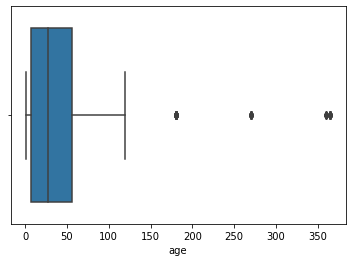

In [71]:
sns.boxplot(concrete.age) # powyzej 150

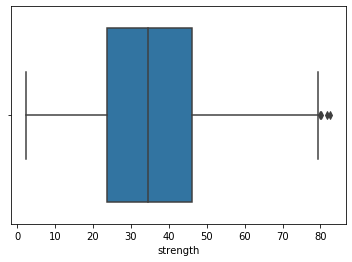

In [68]:
sns.boxplot(concrete.strength) # powyzej 78

In [87]:
mask = concrete.slag >350
concrete.loc[mask,'slag'] = np.nan

In [88]:
mask = concrete.water<130
concrete.loc[mask,'water'] = np.nan

In [89]:
mask =concrete.water>230
concrete.loc[mask,'water'] = np.nan

In [90]:
mask = concrete.superplastic>25
concrete.loc[mask,'superplastic']=np.nan

In [91]:
mask=concrete.fineagg>950
concrete.loc[mask,'fineagg']=np.nan

In [92]:
mask=concrete.age>150
concrete.loc[mask,'age']=np.nan

In [93]:
mask=concrete.strength>78
concrete.loc[mask,'strength']=np.nan

In [94]:
concrete.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1028.000000  1030.000000  1014.000000   1020.000000   
mean    281.167864    73.340370    54.188350   182.002367      5.969412   
std     104.506364    85.437542    63.997004    20.252171      5.503811   
min     102.000000     0.000000     0.000000   137.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.925000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.150000   
75%     350.000000   142.800000   118.300000   192.000000     10.100000   
max     540.000000   342.100000   200.100000   228.000000     23.400000   

         coarseagg      fineagg         age     strength  
count  1030.000000  1025.000000  971.000000  1020.000000  
mean    972.918932   772.512098   32.514933    35.384863  
std      77.753954    78.893641   28.616384    16.200868  
min     801.000000   594.000000    1.000000     2.330000  
25%     932.000000   730.000000    7.000000    23.610000  
50%     968.000000   779.300000   28.000000    33.955000  
75%    1029.400000   822.200000   28.000000    45.370000  
max    1145.000000   945.000000  120.000000    77.300000

In [95]:
concrete.age = concrete.age.fillna(concrete.mode().iloc[0][7])

In [103]:
concrete.mode().iloc[0]

cement          362.6
slag              0.0
ash               0.0
water           192.0
superplastic      0.0
coarseagg       932.0
fineagg         594.0
age              28.0
strength         33.4
Name: 0, dtype: float64

In [101]:
concrete.isnull().any()

cement          False
slag             True
ash             False
water            True
superplastic     True
coarseagg       False
fineagg          True
age             False
strength         True
dtype: bool

In [104]:
concrete.slag=concrete.slag.fillna(concrete.mode().iloc[0][1])

In [105]:
concrete.water = concrete.water.fillna(concrete.mode().iloc[0][3])

In [106]:
concrete.superplastic = concrete.superplastic.fillna(concrete.mode().iloc[0][4])

In [107]:
concrete.fineagg = concrete.fineagg.fillna(concrete.mode().iloc[0][6])

In [108]:
concrete.strength = concrete.strength.fillna(concrete.mode().iloc[0][8])

In [109]:
concrete.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [110]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


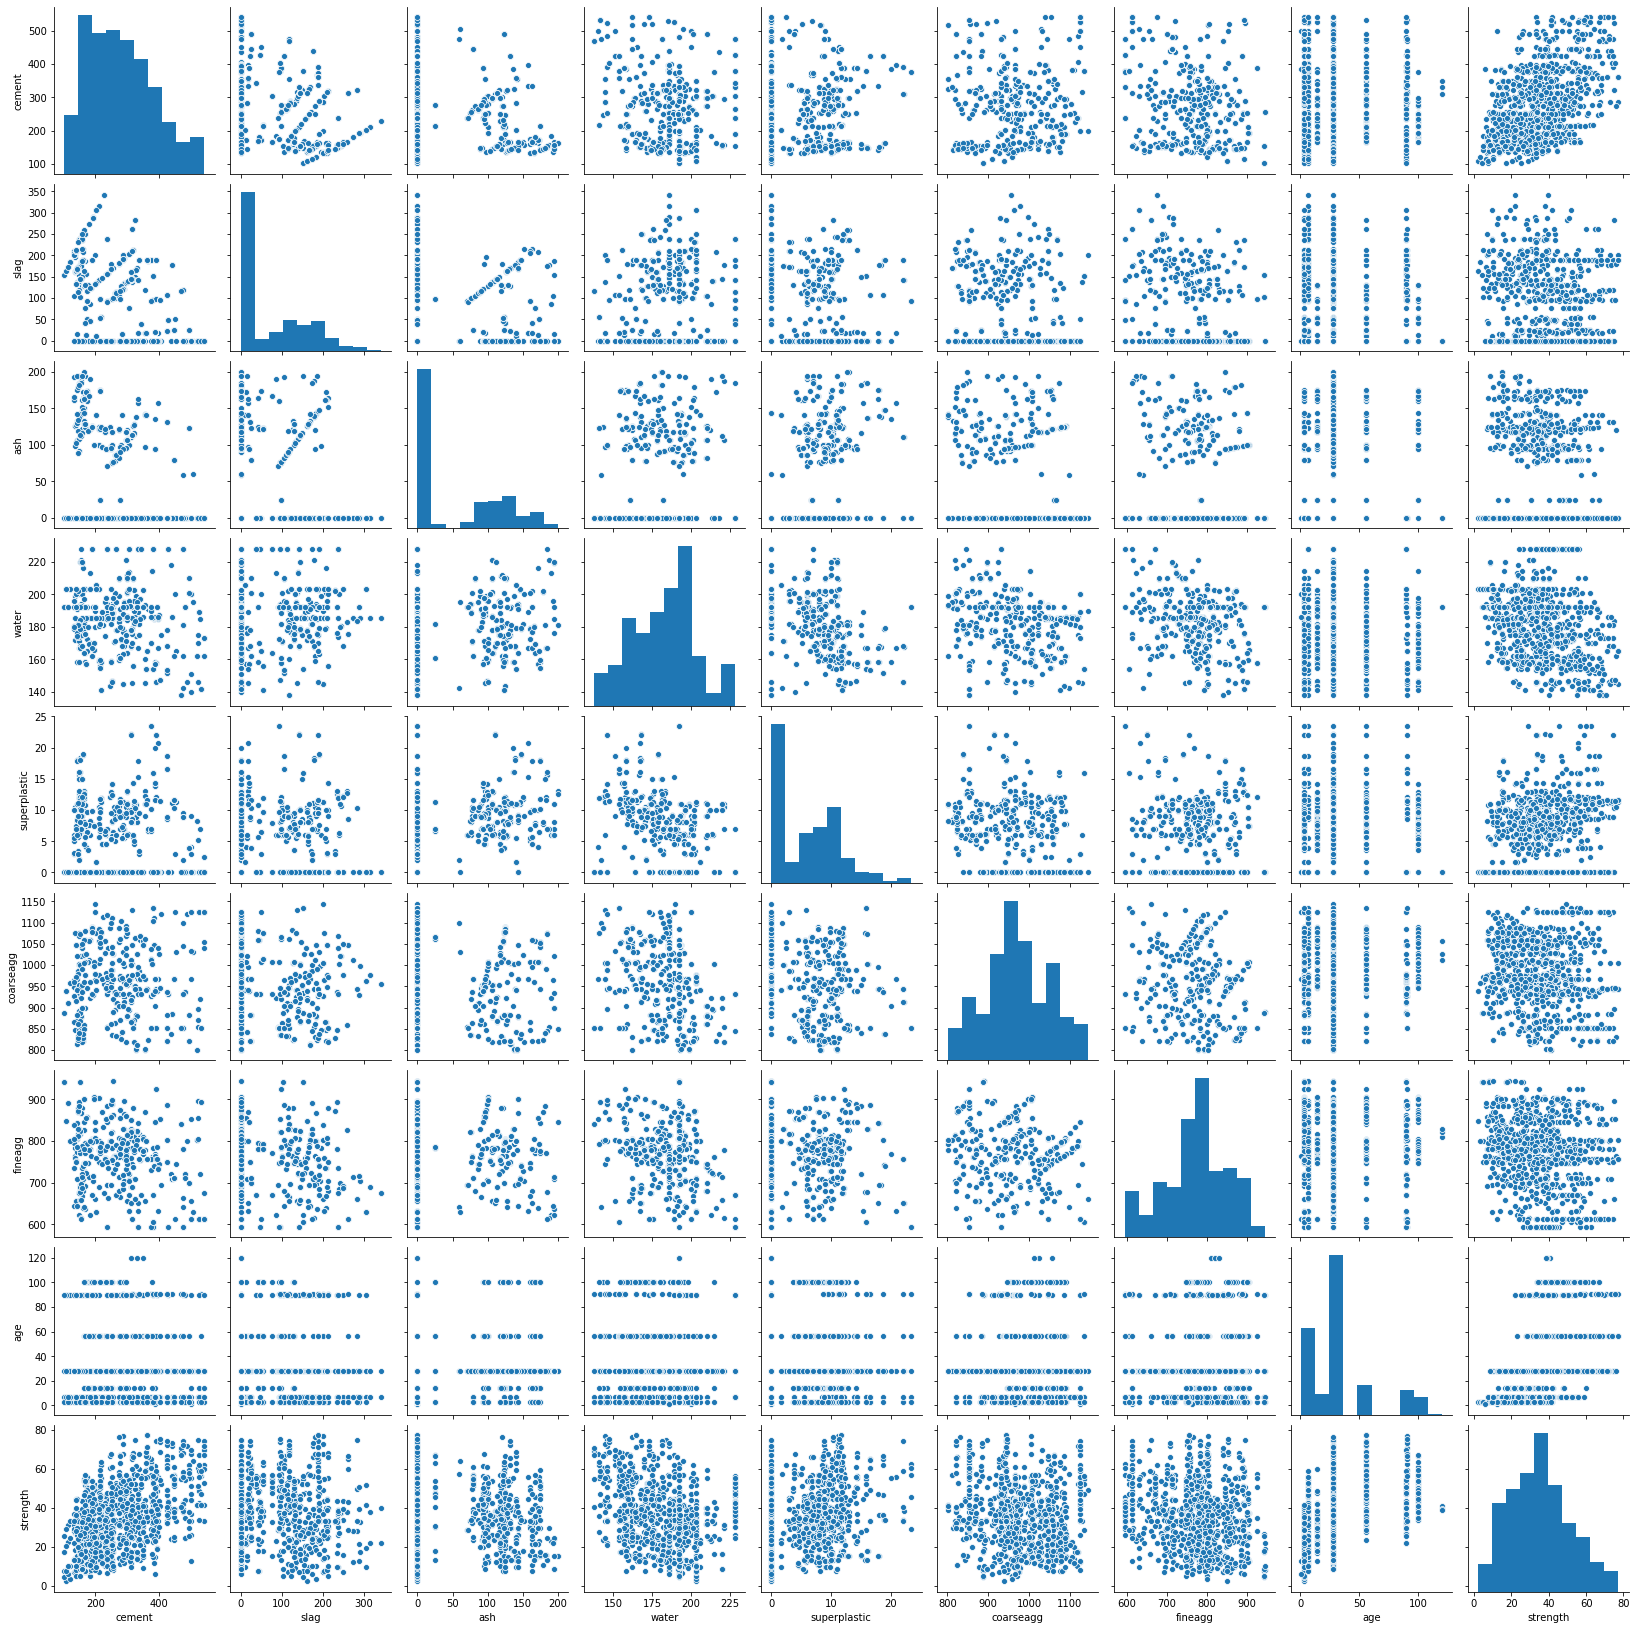

In [111]:
sns.pairplot(concrete)#wykresy wszystkich zmiennych w w porownaniu do wszystkich zmiennych
plt.show()

In [114]:
corr_P = concrete.corr("pearson")#korelacje pomiedzy zmiennymi
corr_P

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.274746 -0.397467 -0.080716     -0.010399  -0.109349   
slag         -0.274746  1.000000 -0.319927  0.110366      0.063300  -0.283576   
ash          -0.397467 -0.319927  1.000000 -0.268629      0.454530  -0.009961   
water        -0.080716  0.110366 -0.268629  1.000000     -0.593747  -0.183042   
superplastic -0.010399  0.063300  0.454530 -0.593747      1.000000  -0.205692   
coarseagg    -0.109349 -0.283576 -0.009961 -0.183042     -0.205692   1.000000   
fineagg      -0.245945 -0.280886  0.100190 -0.432699      0.104491  -0.141831   
age          -0.031962 -0.028695  0.057928 -0.039236      0.059736   0.018078   
strength      0.487734  0.115702 -0.085796 -0.279635      0.310925  -0.174019   

               fineagg       age  strength  
cement       -0.245945 -0.031962  0.487734  
slag         -0.280886 -0.028695  0.115702  
ash           0.100190  0.057928 -0.085796  
water        -0.432699 -0.039236 -0.279635  
superplastic  0.104491  0.059736  0.310925  
coarseagg    -0.141831  0.018078 -0.174019  
fineagg       1.000000  0.048974 -0.184435  
age           0.048974  1.000000  0.484784  
strength     -0.184435  0.484784  1.000000

In [115]:
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [117]:
y = concrete.iloc[:,-1]

In [119]:
X = concrete.iloc[:,:-1]

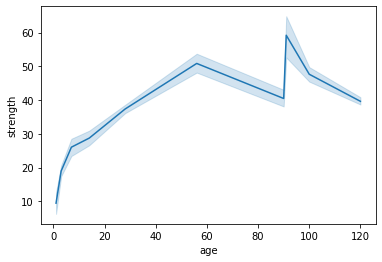

In [127]:
sns.lineplot(concrete.age,concrete.strength)#wykres zmiennej age w porownaniu do strength

In [128]:
import sklearn.linear_model

In [131]:
mnk = sklearn.linear_model.LinearRegression()

In [133]:
mnk.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred = mnk.predict(X)

In [143]:
len(y_pred)

1030

In [137]:
mnk.score(X,y)

0.6703021032050264

In [138]:
sklearn.metrics.r2_score(y, y_pred)#dosyc niska wartosc wsp. R^2

0.6703021032050264

In [139]:
sklearn.metrics.mean_squared_error(y, y_pred)

85.62351348998033

In [149]:
sklearn.metrics.mean_absolute_error(y, y_pred) #srednia wartosci y wynosi 35, wiec blad wynosi okolo 12%, to dosyc duzo

6.981308650453479

In [141]:
sklearn.metrics.median_absolute_error(y, y_pred)

5.363977866944911

In [150]:
X_std = (X-X.mean(axis=0))/X.std(axis=0)
X_std.describe() #srednia 0 odchylenie 1

cement          slag           ash         water  superplastic  \
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03   
mean   1.192574e-15 -3.082755e-16  6.036164e-18  5.202203e-15 -3.229348e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.714421e+00 -8.569627e-01 -8.467326e-01 -2.203326e+00 -1.073206e+00   
25%   -8.496407e-01 -8.569627e-01 -8.467326e-01 -8.224496e-01 -1.073206e+00   
50%   -7.911350e-02 -5.993984e-01 -8.467326e-01  1.759540e-01  3.422951e-02   
75%    6.586406e-01  8.139855e-01  1.001791e+00  4.888865e-01  7.558782e-01   
max    2.476712e+00  3.148162e+00  2.279976e+00  2.277072e+00  3.174990e+00   

          coarseagg       fineagg           age  
count  1.030000e+03  1.030000e+03  1.030000e+03  
mean  -7.663773e-16  1.226635e-16 -1.082198e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.211064e+00 -2.229636e+00 -1.124178e+00  
25%   -5.262618e-01 -5.515622e-01 -9.083793e-01  
50%   -6.326279e-02  9.105109e-02 -1.530843e-01  
75%    7.264077e-01  6.345111e-01 -1.530843e-01  
max    2.213149e+00  2.175779e+00  3.155827e+00

In [151]:
y_std = (y-y.mean(axis=0))/y.std(axis=0)
y_std.describe() #srednia 0 odchylenie 1

count    1.030000e+03
mean    -1.647226e-15
std      1.000000e+00
min     -2.048956e+00
25%     -7.229113e-01
50%     -9.834271e-02
75%      6.127475e-01
max      2.600885e+00
Name: strength, dtype: float64

In [152]:
mnk_std = sklearn.linear_model.LinearRegression()
mnk_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
y_pred_std=mnk_std.predict(X_std)

In [155]:
mnk_std.score(X_std,y_std) #wsp. R^2 nie zmienil sie, poniewaz wszystkie dane zostaly zmienione o swoja srednia i odchylenie

0.6703021032050264

In [156]:
sklearn.metrics.mean_squared_error(y_std, y_pred_std)
#wartosci ponizszych metryk zmienily sie tylko dlatego ze unormowalismy zbior, a nie dlatego
#ze model sie poprawil

0.3293778017495418

In [157]:
sklearn.metrics.mean_absolute_error(y_std, y_pred_std)

0.4329995848928498

In [158]:
sklearn.metrics.median_absolute_error(y_std, y_pred_std)

0.33268836919432143

In [159]:
#podzialy na zbiory treningowe i testowe

In [164]:
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)

In [161]:
def fit_regression(X_ucz, X_test, y_ucz, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(X_ucz, y_ucz)
    y_ucz_pred = r.predict(X_ucz)
    y_test_pred = r.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }

In [196]:
params = ["Reg. liniowa 80-20"]
res = [fit_regression(X_ucz, X_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)

r_score_u  r_score_t      MSE_u      MSE_t     MAE_u  \
Reg. liniowa 80-20   0.666129   0.677921  83.208774  96.656887  6.835155   

                       MAE_t  
Reg. liniowa 80-20  7.651091

In [165]:
X_ucz10, X_test10, y_ucz10, y_test10 = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=12345)

In [197]:
params.append("Reg. liniowa 90-10")
res.append(fit_regression(X_ucz10, X_test10, y_ucz10, y_test10))
pd.DataFrame(res, index=params)

r_score_u  r_score_t      MSE_u       MSE_t     MAE_u  \
Reg. liniowa 80-20   0.666129   0.677921  83.208774   96.656887  6.835155   
Reg. liniowa 90-10   0.672307   0.643870  82.999969  110.215958  6.841261   

                       MAE_t  
Reg. liniowa 80-20  7.651091  
Reg. liniowa 90-10  8.184418

In [167]:
X_ucz30, X_test30, y_ucz30, y_test30 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)

In [198]:
params.append("Reg. liniowa 70-30")
res.append(fit_regression(X_ucz30, X_test30, y_ucz30, y_test30))
pd.DataFrame(res, index=params)

r_score_u  r_score_t      MSE_u       MSE_t     MAE_u  \
Reg. liniowa 80-20   0.666129   0.677921  83.208774   96.656887  6.835155   
Reg. liniowa 90-10   0.672307   0.643870  82.999969  110.215958  6.841261   
Reg. liniowa 70-30   0.668094   0.670068  83.480537   91.388390  6.822461   

                       MAE_t  
Reg. liniowa 80-20  7.651091  
Reg. liniowa 90-10  8.184418  
Reg. liniowa 70-30  7.362246

In [169]:
X_ucz40, X_test40, y_ucz40, y_test40 = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=12345)

In [199]:
params.append("Reg. liniowa 60-40")
res.append(fit_regression(X_ucz40, X_test40, y_ucz40, y_test40))
pd.DataFrame(res, index=params)

r_score_u  r_score_t      MSE_u       MSE_t     MAE_u  \
Reg. liniowa 80-20   0.666129   0.677921  83.208774   96.656887  6.835155   
Reg. liniowa 90-10   0.672307   0.643870  82.999969  110.215958  6.841261   
Reg. liniowa 70-30   0.668094   0.670068  83.480537   91.388390  6.822461   
Reg. liniowa 60-40   0.683185   0.646950  80.128309   94.913754  6.692551   

                       MAE_t  
Reg. liniowa 80-20  7.651091  
Reg. liniowa 90-10  8.184418  
Reg. liniowa 70-30  7.362246  
Reg. liniowa 60-40  7.389715

In [171]:
X_ucz50, X_test50, y_ucz50, y_test50 = sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=12345)

In [200]:
params.append("Reg. liniowa 50-50")
res.append(fit_regression(X_ucz50, X_test50, y_ucz50, y_test50))
pd.DataFrame(res, index=params)

r_score_u  r_score_t      MSE_u       MSE_t     MAE_u  \
Reg. liniowa 80-20   0.666129   0.677921  83.208774   96.656887  6.835155   
Reg. liniowa 90-10   0.672307   0.643870  82.999969  110.215958  6.841261   
Reg. liniowa 70-30   0.668094   0.670068  83.480537   91.388390  6.822461   
Reg. liniowa 60-40   0.683185   0.646950  80.128309   94.913754  6.692551   
Reg. liniowa 50-50   0.713491   0.620540  72.874175  100.335188  6.503608   

                       MAE_t  
Reg. liniowa 80-20  7.651091  
Reg. liniowa 90-10  8.184418  
Reg. liniowa 70-30  7.362246  
Reg. liniowa 60-40  7.389715  
Reg. liniowa 50-50  7.405566

In [173]:
X_ucz_std, X_test_std, y_ucz_std, y_test_std = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.2, random_state=12345)

In [202]:
params_std = ["Reg. liniowa STD 80-20"]
res_std = [fit_regression(X_ucz_std, X_test_std, y_ucz_std, y_test_std)]
pd.DataFrame(res_std, index=params_std)

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa STD 80-20   0.666129   0.677921  0.320089  0.371821  0.423935   

                           MAE_t  
Reg. liniowa STD 80-20  0.474541

In [181]:
X_ucz_std10, X_test_std10, y_ucz_std10, y_test_std10 = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.1, random_state=12345)

In [203]:
params_std.append("Reg. liniowa STD 90-10")
res_std.append(fit_regression(X_ucz_std10, X_test_std10, y_ucz_std10, y_test_std10))
pd.DataFrame(res_std, index=params_std)

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa STD 80-20   0.666129   0.677921  0.320089  0.371821  0.423935   
Reg. liniowa STD 90-10   0.672307   0.643870  0.319286  0.423980  0.424313   

                           MAE_t  
Reg. liniowa STD 80-20  0.474541  
Reg. liniowa STD 90-10  0.507620

In [183]:
X_ucz_std30, X_test_std30, y_ucz_std30, y_test_std30 = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.3, random_state=12345)

In [204]:
params_std.append("Reg. liniowa STD 70-30")
res_std.append(fit_regression(X_ucz_std30, X_test_std30, y_ucz_std30, y_test_std30))
pd.DataFrame(res_std, index=params_std)

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa STD 80-20   0.666129   0.677921  0.320089  0.371821  0.423935   
Reg. liniowa STD 90-10   0.672307   0.643870  0.319286  0.423980  0.424313   
Reg. liniowa STD 70-30   0.668094   0.670068  0.321134  0.351554  0.423147   

                           MAE_t  
Reg. liniowa STD 80-20  0.474541  
Reg. liniowa STD 90-10  0.507620  
Reg. liniowa STD 70-30  0.456626

In [185]:
X_ucz_std40, X_test_std40, y_ucz_std40, y_test_std40 = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.4, random_state=12345)

In [205]:
params_std.append("Reg. liniowa STD 60-40")
res_std.append(fit_regression(X_ucz_std40, X_test_std40, y_ucz_std40, y_test_std40))
pd.DataFrame(res_std, index=params_std)

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa STD 80-20   0.666129   0.677921  0.320089  0.371821  0.423935   
Reg. liniowa STD 90-10   0.672307   0.643870  0.319286  0.423980  0.424313   
Reg. liniowa STD 70-30   0.668094   0.670068  0.321134  0.351554  0.423147   
Reg. liniowa STD 60-40   0.683185   0.646950  0.308239  0.365116  0.415090   

                           MAE_t  
Reg. liniowa STD 80-20  0.474541  
Reg. liniowa STD 90-10  0.507620  
Reg. liniowa STD 70-30  0.456626  
Reg. liniowa STD 60-40  0.458330

In [187]:
X_ucz_std50, X_test_std50, y_ucz_std50, y_test_std50 = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.5, random_state=12345)

In [206]:
params_std.append("Reg. liniowa STD 50-50")
res_std.append(fit_regression(X_ucz_std50, X_test_std50, y_ucz_std50, y_test_std50))
pd.DataFrame(res_std, index=params_std)

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa STD 80-20   0.666129   0.677921  0.320089  0.371821  0.423935   
Reg. liniowa STD 90-10   0.672307   0.643870  0.319286  0.423980  0.424313   
Reg. liniowa STD 70-30   0.668094   0.670068  0.321134  0.351554  0.423147   
Reg. liniowa STD 60-40   0.683185   0.646950  0.308239  0.365116  0.415090   
Reg. liniowa STD 50-50   0.713491   0.620540  0.280333  0.385971  0.403371   

                           MAE_t  
Reg. liniowa STD 80-20  0.474541  
Reg. liniowa STD 90-10  0.507620  
Reg. liniowa STD 70-30  0.456626  
Reg. liniowa STD 60-40  0.458330  
Reg. liniowa STD 50-50  0.459313

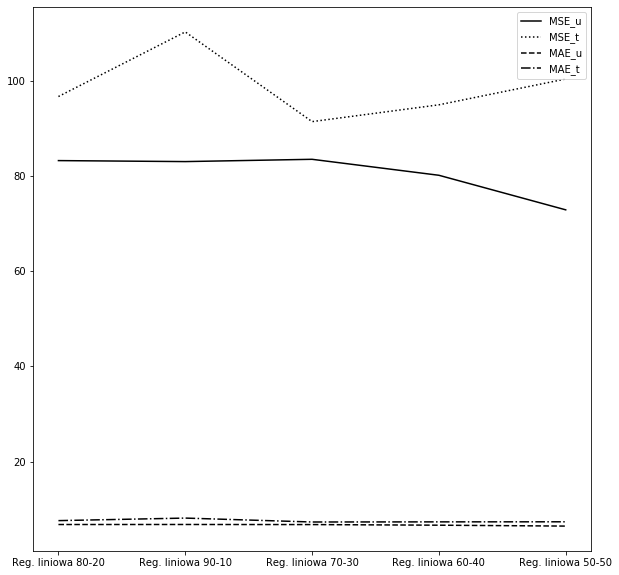

In [215]:
wynik=pd.DataFrame(res, index=params)
wynik.drop(["r_score_u","r_score_t"],axis=1).plot(style=["-", ":", "--", "-."], color="k",figsize=(10,10))

plt.xticks(np.arange(len(wynik.index.tolist())), wynik.index.tolist())
plt.show()

In [208]:
wynik_std=pd.DataFrame(res_std,index=params_std)

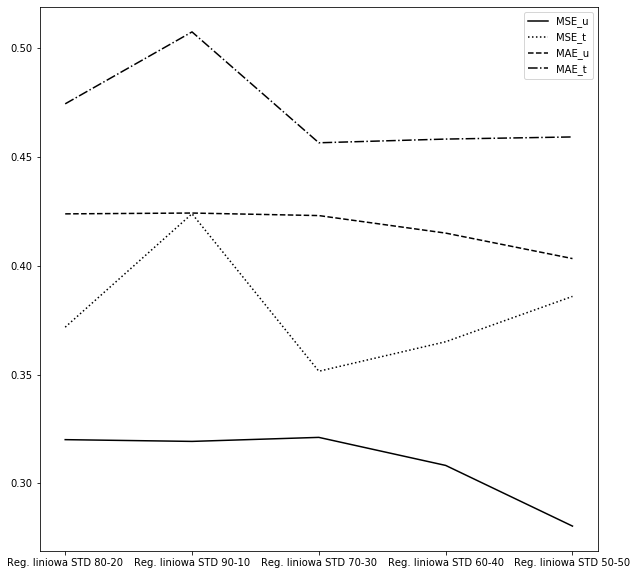

In [216]:
wynik_std.drop(["r_score_u","r_score_t"],axis=1).plot(style=["-", ":", "--", "-."], color="k",figsize=(10,10))

plt.xticks(np.arange(len(wynik_std.index.tolist())), wynik_std.index.tolist())
plt.show()

In [218]:
wynik_sum=wynik.append(wynik_std)

In [219]:
wynik_sum

r_score_u  r_score_t      MSE_u       MSE_t     MAE_u  \
Reg. liniowa 80-20       0.666129   0.677921  83.208774   96.656887  6.835155   
Reg. liniowa 90-10       0.672307   0.643870  82.999969  110.215958  6.841261   
Reg. liniowa 70-30       0.668094   0.670068  83.480537   91.388390  6.822461   
Reg. liniowa 60-40       0.683185   0.646950  80.128309   94.913754  6.692551   
Reg. liniowa 50-50       0.713491   0.620540  72.874175  100.335188  6.503608   
Reg. liniowa STD 80-20   0.666129   0.677921   0.320089    0.371821  0.423935   
Reg. liniowa STD 90-10   0.672307   0.643870   0.319286    0.423980  0.424313   
Reg. liniowa STD 70-30   0.668094   0.670068   0.321134    0.351554  0.423147   
Reg. liniowa STD 60-40   0.683185   0.646950   0.308239    0.365116  0.415090   
Reg. liniowa STD 50-50   0.713491   0.620540   0.280333    0.385971  0.403371   

                           MAE_t  
Reg. liniowa 80-20      7.651091  
Reg. liniowa 90-10      8.184418  
Reg. liniowa 70-30      7.362246  
Reg. liniowa 60-40      7.389715  
Reg. liniowa 50-50      7.405566  
Reg. liniowa STD 80-20  0.474541  
Reg. liniowa STD 90-10  0.507620  
Reg. liniowa STD 70-30  0.456626  
Reg. liniowa STD 60-40  0.458330  
Reg. liniowa STD 50-50  0.459313

In [ ]:
#z powyzszych wykresow zmian podzialu zbioru treningowego i testowego wynika, ze najlepszym podzialem
#dla obu zbiorow normalnego oraz unormowanego i wystandaryzowanego jest podzial 70-30 wystapilo tam 
#najwieksze zblizenie sie bledow srednio kwadratowego i bezwzglednego w zbiorach uczacych i testowych,
#rowniez metryka R^2 wzrosla. Natomiast najgorszym z podzialow jest podzial 90-10 gdzie model ma 
#tendencje do nauczania sie na pamiec i nie wykrywania prawidlowych wartosci poza zbiorem 
#na ktorym sie uczyl.